# This script is creates predicitions to win a match in Dota 2 game
- Dota 2 saves match data after each game and anyone can access the data with an API
- Data in this analysis is colleceted by using Dota 2 API wrapper: https://github.com/whoophee/d2api
- We are testing two different models to create predictions: decision tree and logistic regression

# Importing libraries

In [1]:
import requests
import d2api #dota 2 API wrapper

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libarires
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

#visualising decision tree
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 



## Reading and exploring the data

In [2]:
ml_data = pd.read_csv("./data/large_ml_data.csv").drop(['Unnamed: 0', 'radiant'],axis=1) 


In [3]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Columns: 134 entries, win to scepter
dtypes: bool(1), int64(133)
memory usage: 20.3 MB


In [4]:
ml_data.describe()

,Abaddon,Alchemist,Ancient Apparition,Anti-Mage,Arc Warden,Axe,Bane,Batrider,Beastmaster,Bloodseeker,...,Ranged,agi,int,str,dire,gold,lastHits,denies,shard,scepter
count,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,...,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000
mean,0.004706,0.004856,0.003955,0.014118,0.004005,0.009913,0.002904,0.001802,0.001502,0.014619,...,0.522479,0.386152,0.333333,0.280515,0.500000,396.400621,123.818564,4.524482,0.155452,0.018424
std,0.068441,0.069520,0.062767,0.117982,0.063161,0.099071,0.053810,0.042417,0.038727,0.120025,...,0.499507,0.486878,0.471416,0.449262,0.500013,138.816647,95.392916,5.729362,0.362344,0.134482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,299.000000,53.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.500000,378.000000,101.000000,3.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,476.000000,169.000000,7.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1515.000000,1044.000000,65.000000,1.000000,1.000000


<AxesSubplot:>

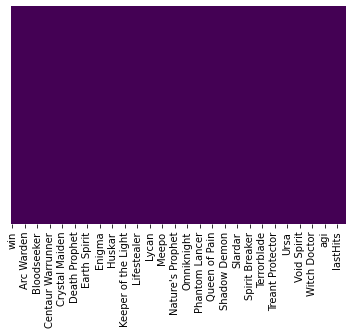

In [5]:
sns.heatmap(ml_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# Heatmap doesn't show any null values



In [6]:
#printing all data to check if there are any null values as the heatmap graph is missing columns in the graph
for column in ml_data.columns:
    print(column  + " " + str(ml_data[column].isnull().sum()))

win 0
Abaddon 0
Alchemist 0
Ancient Apparition 0
Anti-Mage 0
Arc Warden 0
Axe 0
Bane 0
Batrider 0
Beastmaster 0
Bloodseeker 0
Bounty Hunter 0
Brewmaster 0
Bristleback 0
Broodmother 0
Centaur Warrunner 0
Chaos Knight 0
Chen 0
Clinkz 0
Clockwerk 0
Crystal Maiden 0
Dark Seer 0
Dark Willow 0
Dawnbreaker 0
Dazzle 0
Death Prophet 0
Disruptor 0
Doom 0
Dragon Knight 0
Drow Ranger 0
Earth Spirit 0
Earthshaker 0
Elder Titan 0
Ember Spirit 0
Enchantress 0
Enigma 0
Faceless Void 0
Grimstroke 0
Gyrocopter 0
Hoodwink 0
Huskar 0
Invoker 0
Io 0
Jakiro 0
Juggernaut 0
Keeper of the Light 0
Kunkka 0
Legion Commander 0
Leshrac 0
Lich 0
Lifestealer 0
Lina 0
Lion 0
Lone Druid 0
Luna 0
Lycan 0
Magnus 0
Marci 0
Mars 0
Medusa 0
Meepo 0
Mirana 0
Monkey King 0
Morphling 0
Naga Siren 0
Nature's Prophet 0
Necrophos 0
Night Stalker 0
Nyx Assassin 0
Ogre Magi 0
Omniknight 0
Oracle 0
Outworld Destroyer 0
Pangolier 0
Phantom Assassin 0
Phantom Lancer 0
Phoenix 0
Puck 0
Pudge 0
Pugna 0
Queen of Pain 0
Razor 0
Riki 0
Ru

<AxesSubplot:xlabel='win', ylabel='count'>

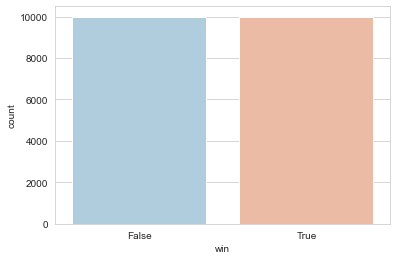

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='win',data=ml_data,palette='RdBu_r')
#Dataset is balanced and there equal amount of wins and losses

<AxesSubplot:xlabel='win', ylabel='count'>

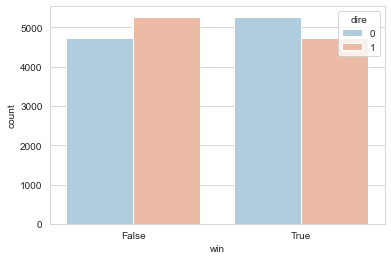

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='win',data=ml_data,hue='dire',palette='RdBu_r')
#Player in dire side has more losses than wins

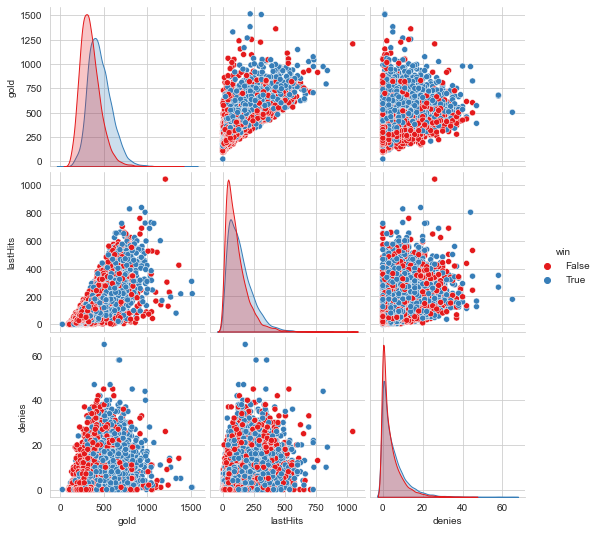

In [9]:
sns.pairplot(ml_data[['win', 'gold', 'lastHits', 'denies']],hue='win',palette='Set1')
##  more  gold, lasthits or denies, the more wins 

# Splitting data to train and test datasets


In [10]:
X = ml_data.drop('win',axis=1)
y = ml_data['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101) #setting test size to 30%

# Analysing the data with desicion tree and validating results with confusion matrix and and classification report

In [11]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

#model is 73% accurate

              precision    recall  f1-score   support

       False       0.75      0.67      0.71      3003
        True       0.70      0.78      0.74      2990

    accuracy                           0.73      5993
   macro avg       0.73      0.73      0.73      5993
weighted avg       0.73      0.73      0.73      5993

[[2027  976]
 [ 664 2326]]


# Visualising entropy and desicion tree sturcture 

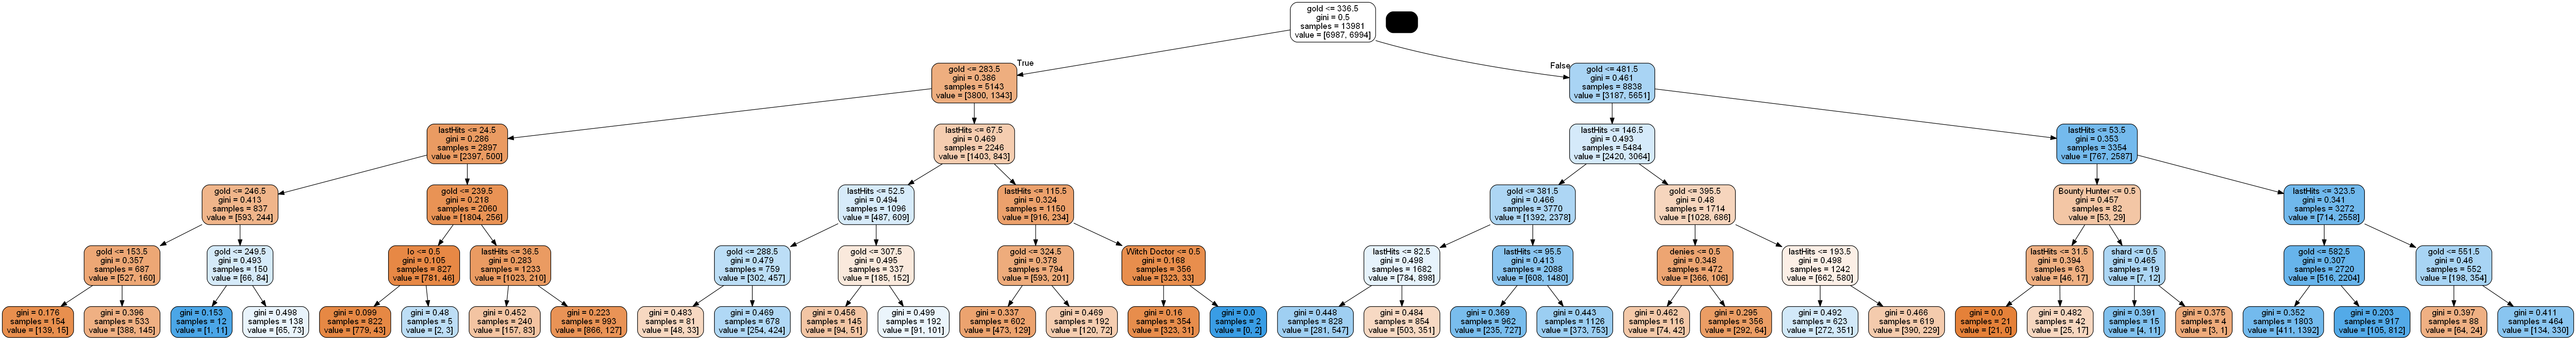

In [12]:
features = list(ml_data.columns[1:])
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# Creating predictions by using logistic regression

In [13]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

logPredictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,logPredictions))

              precision    recall  f1-score   support

       False       0.71      0.75      0.73      3003
        True       0.73      0.69      0.71      2990

    accuracy                           0.72      5993
   macro avg       0.72      0.72      0.72      5993
weighted avg       0.72      0.72      0.72      5993



#### Logistic regression is doing slightly worse than decision tree.  Accuracy can be higher and feature selection would improve the model and predictions